In [1]:
# --- Cell 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# --- Cell 2: Load Data ---
# Note: This path works because of our project structure!
train_df = pd.read_csv('../Data/Raw/train.csv')
print(f"Training Data Shape: {train_df.shape}")
train_df.head()

Training Data Shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


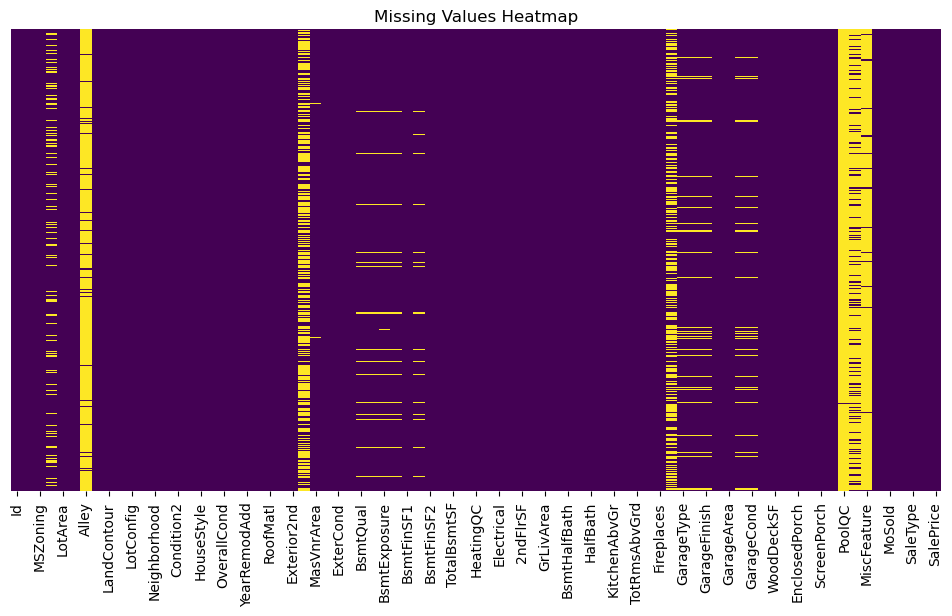

In [3]:
# --- Cell 3: Exploratory Data Analysis (EDA) ---
# Check for missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

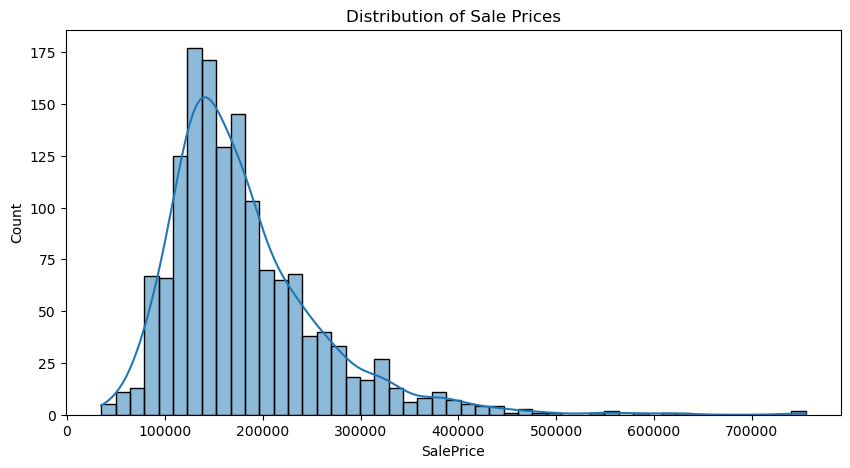

In [4]:
# Distribution of the target variable 'SalePrice'
plt.figure(figsize=(10, 5))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

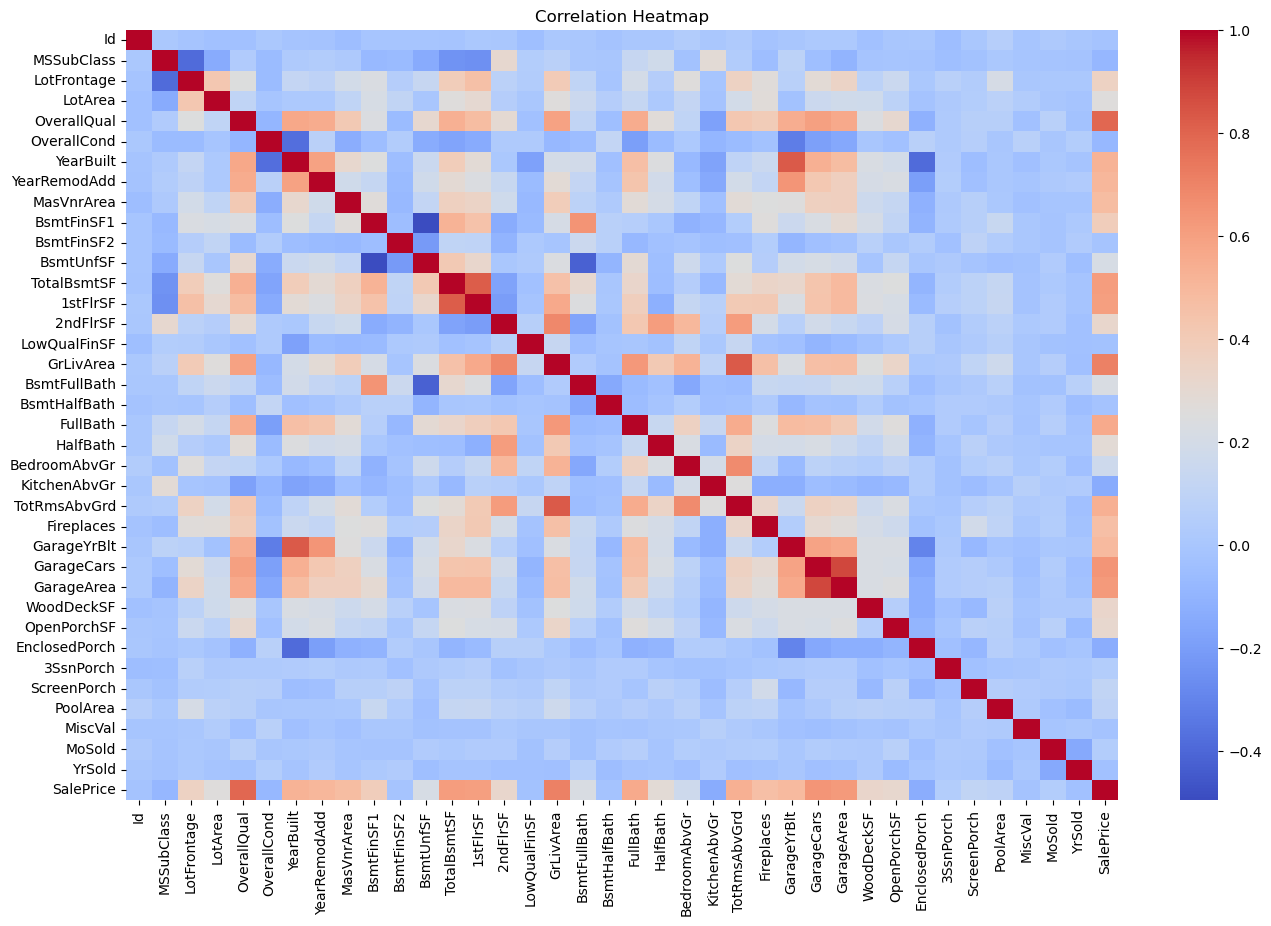

In [5]:
# Correlation heatmap for numerical features
corr_matrix = train_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# --- Cell 4: Data Preprocessing ---
# Handle missing values (simple example)
# For simplicity, we'll drop columns with many missing values and rows with a few.
train_df_clean = train_df.dropna(axis=1, thresh=0.8 * len(train_df)) # Drop cols with >20% missing
train_df_clean = train_df_clean.dropna(axis=0) # Drop rows with any missing values

In [7]:
# Select features and target
# Let's pick a few highly correlated features for this simple example
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
X = train_df_clean[features]
y = train_df_clean['SalePrice']

In [8]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# --- Cell 5: Model Training ---
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# --- Cell 6: Model Evaluation ---
# Make predictions
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

In [12]:
# Calculate metrics
print("Training Metrics:")
print(f"MAE: {mean_absolute_error(y_train, train_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, train_preds))}")
print(f"R²: {model.score(X_train_scaled, y_train)}")

Training Metrics:
MAE: 26692.138512459875
RMSE: 41769.05232650892
R²: 0.7417896587563932


In [13]:
print("\nTest Metrics:")
print(f"MAE: {mean_absolute_error(y_test, test_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, test_preds))}")
print(f"R²: {model.score(X_test_scaled, y_test)}")


Test Metrics:
MAE: 25440.661915426703
RMSE: 37293.253576803756
R²: 0.8151136104532536


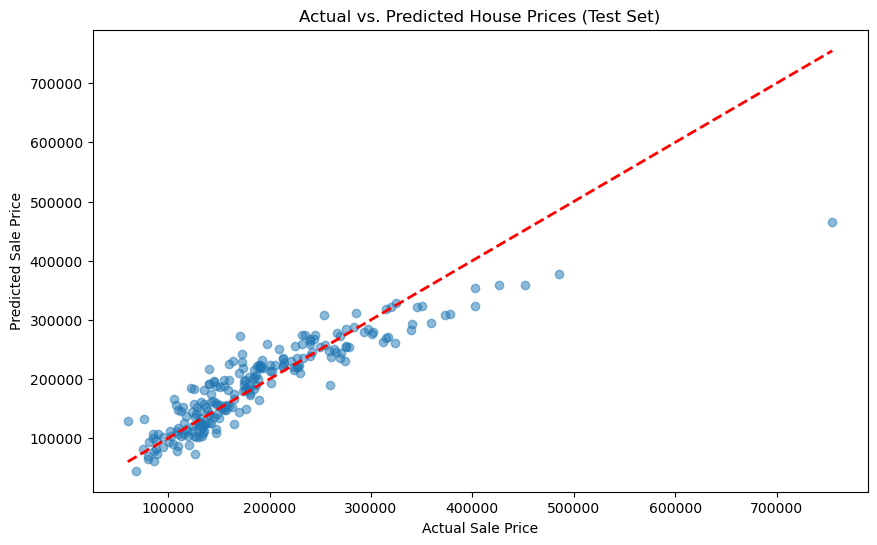

In [14]:
# --- Cell 7: Visualization of Results ---
# Scatter plot of Actual vs. Predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_preds, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs. Predicted House Prices (Test Set)')
plt.show()

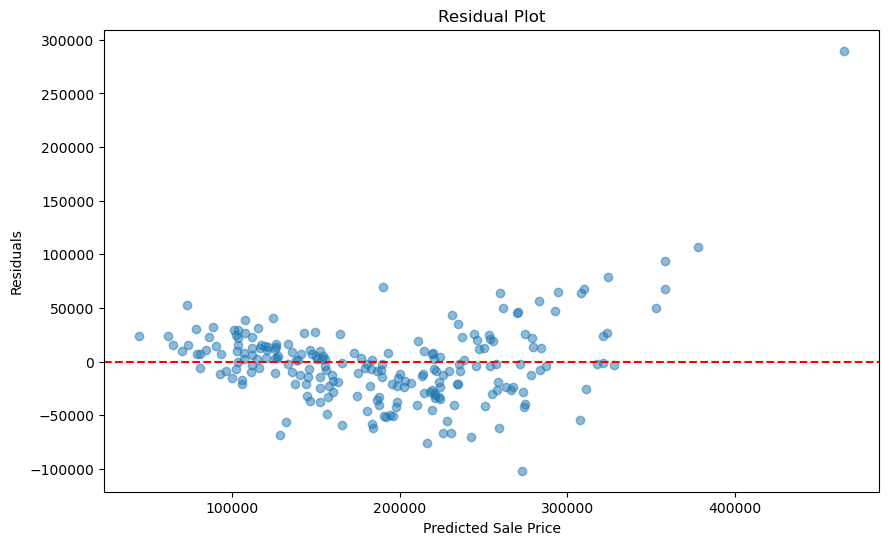

In [15]:
# Residual plot
residuals = y_test - test_preds
plt.figure(figsize=(10, 6))
plt.scatter(test_preds, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [16]:
# In your notebook's final cell
import joblib

# Save the model
joblib.dump(model, '../models/trained_model.pkl')

# Save the scaler as well - THIS IS CRUCIAL!
joblib.dump(scaler, '../models/scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
